In [22]:
import numpy
import pandas
from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import display, HTML
print('Done')

Done


In [2]:
games_df = pandas.read_csv('gamedata.csv', low_memory=False)
games_df = games_df.drop('gameID', axis=1)
print('Data loaded')

games_df['date'] = pandas.to_datetime(games_df['date'], format='%Y%m%d', errors='coerce')
print('Dates calculated')

games_df['year'] = games_df['date'].apply(lambda x: x.year)
print('Year parsed')

games_df['gameID'] = games_df['home'] + games_df['date'].apply(lambda x: x.strftime('%Y%m%d')) + games_df['gameno'].apply(lambda x: str(x))
print('gameID assigned')


games_df = games_df.set_index('gameID')
print('Index set to gameID')

# Keep only games 1901 or later
#games_df = games_df[games_df['year'] >= 1901]
#print('Data saved for 1901 and later')

print('Done')

Data loaded
Dates calculated
Year parsed
gameID assigned
Index set to gameID
Done


In [ ]:
#theyears_df = games_df.groupby('year')
years_df = games_df.groupby('year')
games_by_year = years_df.size()
games_by_year = games_by_year.reset_index()
games_by_year.columns = ['year', 'nGames']
games_by_year = games_by_year.set_index('year')
games_by_year

In [3]:
# First game
games_df[['date', 'visitor', 'visitor_score', 'home', 'home_score']].iloc[0]

date             1871-05-04 00:00:00
visitor                          CL1
visitor_score                      0
home                             FW1
home_score                         2
Name: FW1187105040, dtype: object

In [6]:
# Five longest games
games_df[['date', 'visitor_score', 'home', 'home_score', 'length']].sort_values('length', ascending=False).head(5)

,date,visitor_score,home,home_score,length
gameID,,,,,
WS1192805050,1928-05-05,5,WS1,6,1245.0
CHA198405080,1984-05-08,6,CHA,7,486.0
NYN196405312,1964-05-31,8,NYN,6,443.0
HOU198906030,1989-06-03,4,HOU,5,434.0
PHI201308240,2013-08-24,12,PHI,7,426.0


In [7]:
# Five highest (total) scoring games
games_df['total_score'] = games_df['visitor_score'] + games_df['home_score']
games_df[['date', 'home', 'home_score', 'visitor', 'visitor_score', 'total_score']].sort_values('total_score', ascending=False).head(5)

,date,home,home_score,visitor,visitor_score,total_score
gameID,,,,,,
TRO187106280,1871-06-28,TRO,33,PH1,49,82
PH1187205010,1872-05-01,PH1,34,BL1,19,53
BR2187210050,1872-10-05,BR2,14,BL1,39,53
TRO187107030,1871-07-03,TRO,37,NY2,16,53
WS4187205250,1872-05-25,WS4,23,MID,28,51


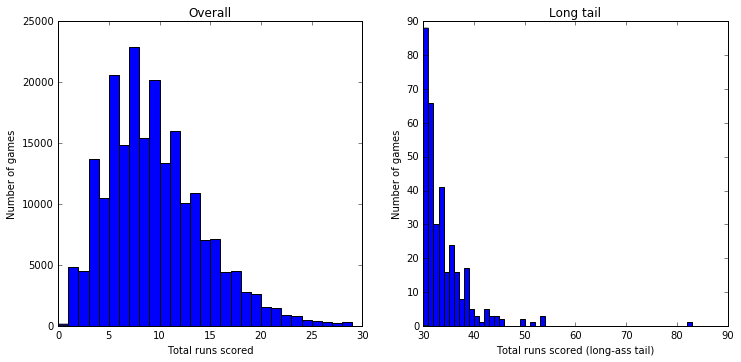

In [9]:
thebins = numpy.arange(0,30)
longbins = numpy.arange(30,90)

fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(221)
ax1.hist(games_df['total_score'], bins=thebins)
plt.xlim([0,30])
#plt.ylim([0,20])
plt.xlabel('Total runs scored')
plt.ylabel('Number of games')
plt.title('Overall')

ax2 = fig.add_subplot(222)
ax2.hist(games_df['total_score'], bins=longbins)

plt.xlim([30,90])
#plt.ylim([0,20])
plt.xlabel('Total runs scored (long-ass tail)')
plt.ylabel('Number of games')
plt.title('Long tail')

#fig.show()


In [45]:
games_df.columns[0:40]

games_df[['visitor_score', 'visitor_h', 'visitor_e']].agg(sum)
visitor_box = games_df[['visitor', 'visitor_score', 'visitor_h', 'visitor_e']].sample(1)
home_box = games_df[['home', 'home_score', 'home_h', 'home_e']].sample(1)

visitor_box[
    ['visitor','visitor_score','visitor_h', 'visitor_e']
].style.format(
    {'visitor': '{:3}', 'visitor_score': '{:,.0f}', 'visitor_h': '{:.0f}', 'visitor_e': '{:,.0f}'}
)

#print('Number of studios according to IMDb: {0:,.0f}'.format(nStudiosIMDb))

#print('{0:s}: {1:,.0f} {2:,.0f} {3:,.0f}'.
#      format(
#        visitor_box['visitor'], 
#        visitor_box['visitor_score'], 
#        visitor_box['visitor_h'], 
#        visitor_box['visitor_e']
#    )
#)

alltime = numpy.zeros((2,4), dtype=object)
alltime[0,0] = 'Visitor'
alltime[1,0] = 'Home'

alltime[0,1:4] = games_df[
    ['visitor_score', 'visitor_h', 'visitor_e']
].dropna().agg(sum)

alltime[1,1:4] = games_df[
    ['home_score', 'home_h', 'home_e']
].dropna().agg(sum)

print('ALL-TIME BOX SCORE')
print('Team\t\tRuns\t\tHits\t\tErrors')
for i in range(0,2):
    print('{0:7}\t\t{1:,.0f}\t\t{2:,.0f}\t{3:,.0f}'.format(alltime[i,0], alltime[i,1], alltime[i,2], alltime[i,3]))

ALL-TIME BOX SCORE
Team		Runs		Hits		Errors
Visitor		794,733		1,637,837	167,352
Home   		822,947		1,621,067	172,440


In [58]:
avgboxscore = numpy.zeros((2,4), dtype=object)
avgboxscore[0,0] = 'Visitor'
avgboxscore[1,0] = 'Home'

avgboxscore[0,1:4] = games_df[
    ['visitor_score', 'visitor_h', 'visitor_e']
].dropna().agg('mean')

avgboxscore[1,1:4] = games_df[
    ['home_score', 'home_h', 'home_e']
].dropna().agg('mean')

print('AVERAGE BOX SCORE')
print('Team\t\tRuns\t\tHits\t\tErrors')
for i in range(0,2):
    print('{0:7}\t\t{1:,.2f}\t\t{2:,.2f}\t\t{3:,.2f}'.format(avgboxscore[i,0], avgboxscore[i,1], avgboxscore[i,2], avgboxscore[i,3]))

AVERAGE BOX SCORE
Team		Runs		Hits		Errors
Visitor		4.36		8.99		0.92
Home   		4.52		8.90		0.95


In [61]:
avgboxscore = numpy.zeros((2,4), dtype=object)
avgboxscore[0,0] = 'Visitor'
avgboxscore[1,0] = 'Home'

avgboxscore[0,1:4] = games_df[
    ['visitor_score', 'visitor_h', 'visitor_e']
].dropna().agg('median')

avgboxscore[1,1:4] = games_df[
    ['home_score', 'home_h', 'home_e']
].dropna().agg('median')

print('MEDIAN BOX SCORE')
print('Team\t\tRuns\t\tHits\t\tErrors')
for i in range(0,2):
    print('{0:7}\t\t{1:,.0f}\t\t{2:,.0f}\t\t{3:,.0f}'.format(avgboxscore[i,0], avgboxscore[i,1], avgboxscore[i,2], avgboxscore[i,3]))

MEDIAN BOX SCORE
Team		Runs		Hits		Errors
Visitor		4		9		1
Home   		4		9		1
